In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd 'drive/MyDrive/Project'
!ls

Mounted at /content/drive
/content/drive/MyDrive/Project
 all_models.ipynb   labels.pkl			  'Weather Forecast.ipynb'
 features.pkl	   'MET Office Weather Data.csv'
 get_data.ipynb     Untitled0.ipynb


In [2]:
import pickle
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# read pickled data
with open('features.pkl', 'rb') as handle:
    X = pickle.load(handle)

with open('labels.pkl', 'rb') as handle:
    y = pickle.load(handle)

X=np.array(X)
y=np.array(y)

print(X.shape)
y.shape

(5083, 4, 8)


(5083,)

In [3]:
X=np.reshape(X,(len(X),-1)) # reshape to 2d
X.shape

(5083, 32)

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3) # split into train/test set

Random forest

In [5]:
clf=RandomForestRegressor(n_estimators=50,n_jobs=-1) # apply the model
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8991901586707832

In [6]:
preds_rnd=clf.predict(X_test) # get predictions
preds_rnd.shape

(1525,)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("mean absolute error: ", mean_absolute_error(y_test, preds_rnd))

mean absolute error:  1.2215842622950819


In [8]:
print("mean squared error: ", mean_squared_error(y_test, preds_rnd))

mean squared error:  2.579704918032787


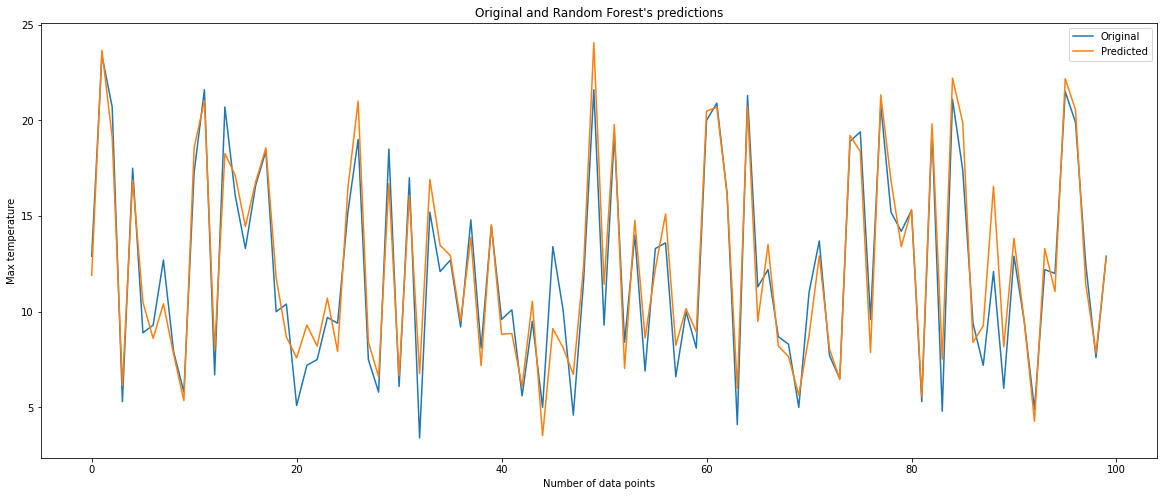

In [9]:
import matplotlib.pyplot as plt

# plot 1st hundred predictions and real values

plt.figure(figsize=(20,8))
plt.plot(y_test[:100],label="Original")
plt.plot(preds_rnd[:100],label="Predicted")
plt.xlabel("Number of data points")
plt.ylabel("Max temperature")
plt.title("Original and Random Forest's predictions")

plt.legend()
plt.show()

XGBoost 

In [10]:
import xgboost as xgb
clf=xgb.XGBRegressor(n_estimators=50,n_jobs=-1) # XGBoost model
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

[01:19:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8843627623945374

In [11]:
preds_xg=clf.predict(X_test) # get predictions
preds_xg.shape

(1525,)

In [12]:
from sklearn.metrics import mean_absolute_error
print("mean absolute error: ", mean_absolute_error(y_test, preds_xg))

mean absolute error:  1.3190253324665007


In [13]:
print("mean squared error: ", mean_squared_error(y_test, preds_xg))

mean squared error:  2.9591352057021973


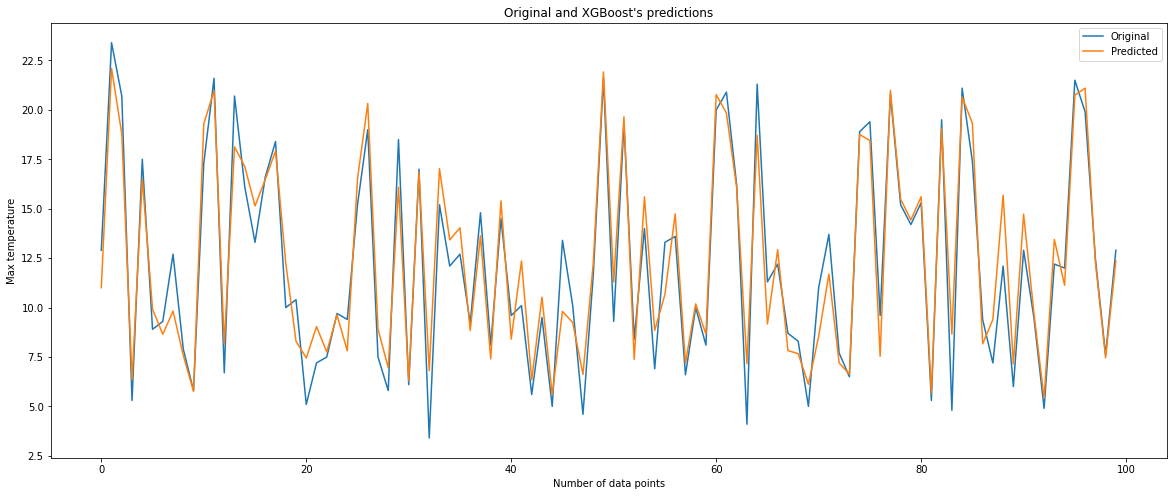

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(y_test[:100],label="Original")
plt.plot(preds_xg[:100],label="Predicted")
plt.xlabel("Number of data points")
plt.ylabel("Max temperature")
plt.title("Original and XGBoost's predictions")

plt.legend()
plt.show()

Lasso Linear Regression

In [15]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.859217571125547

In [16]:
preds_ls=clf.predict(X_test) # get predictions
preds_ls.shape

(1525,)

In [17]:
print("mean absolute error: ", mean_absolute_error(y_test, preds_ls))

mean absolute error:  1.4516517412242094


In [18]:
print("mean squared error: ", mean_squared_error(y_test, preds_ls))

mean squared error:  3.602595930629356


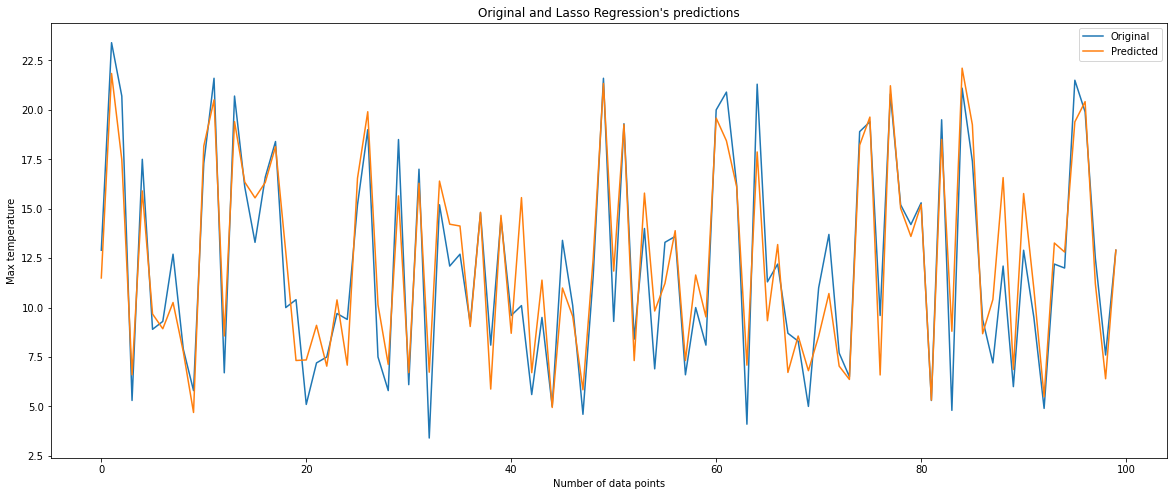

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(y_test[:100],label="Original")
plt.plot(preds_ls[:100],label="Predicted")
plt.xlabel("Number of data points")
plt.ylabel("Max temperature")
plt.title("Original and Lasso Regression's predictions")

plt.legend()
plt.show()

LSTM

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Flatten

In [21]:
X_train=np.reshape(X_train,(len(X_train),4,8))
X_test=np.reshape(X_test,(len(X_test),4,8))

In [22]:
model = Sequential()

model.add(LSTM(128,input_shape=(4,8)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               70144     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 136,705
Trainable params: 136,705
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

es = EarlyStopping(monitor='val_loss', mode='min', patience=5)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, callbacks=[es])

Epoch 1/300
112/112 [==============================] - 5s 23ms/step - loss: 4.6378 - val_loss: 3.4684
Epoch 2/300
112/112 [==============================] - 2s 14ms/step - loss: 2.8686 - val_loss: 2.8660
Epoch 3/300
112/112 [==============================] - 2s 15ms/step - loss: 2.6389 - val_loss: 3.0931
Epoch 4/300
112/112 [==============================] - 2s 14ms/step - loss: 2.5508 - val_loss: 2.6074
Epoch 5/300
112/112 [==============================] - 2s 14ms/step - loss: 2.5129 - val_loss: 2.4335
Epoch 6/300
112/112 [==============================] - 2s 14ms/step - loss: 2.6054 - val_loss: 2.3503
Epoch 7/300
112/112 [==============================] - 2s 13ms/step - loss: 2.4440 - val_loss: 2.4690
Epoch 8/300
112/112 [==============================] - 2s 14ms/step - loss: 2.4391 - val_loss: 2.3403
Epoch 9/300
112/112 [==============================] - 2s 14ms/step - loss: 2.4189 - val_loss: 2.7303
Epoch 10/300
112/112 [==============================] - 2s 14ms/step - loss: 2.473

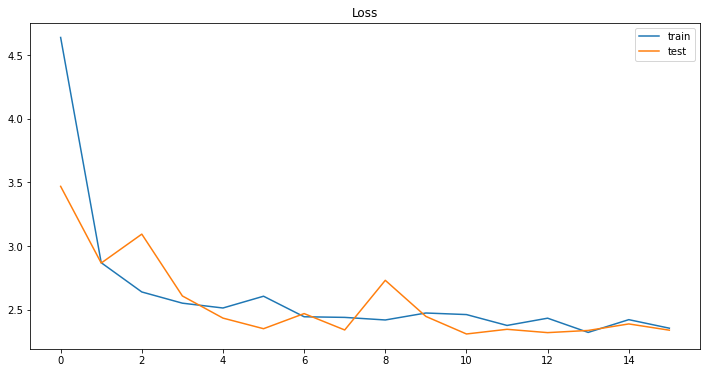

In [24]:
# plot training history
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Loss")
plt.legend()
plt.show()

In [25]:
preds_tm=model.predict(X_test)

48/48 [==============================] - 1s 6ms/step


In [26]:
print("R-squared: ", r2_score(y_test, preds_tm))

R-squared:  0.6464859469381654


In [27]:
from sklearn.metrics import mean_absolute_error
print("mean absolute error: ", mean_absolute_error(y_test, preds_tm))

mean absolute error:  2.338589259100742


In [28]:
print("mean squared error: ", mean_squared_error(y_test, preds_tm))

mean squared error:  9.04635826475617


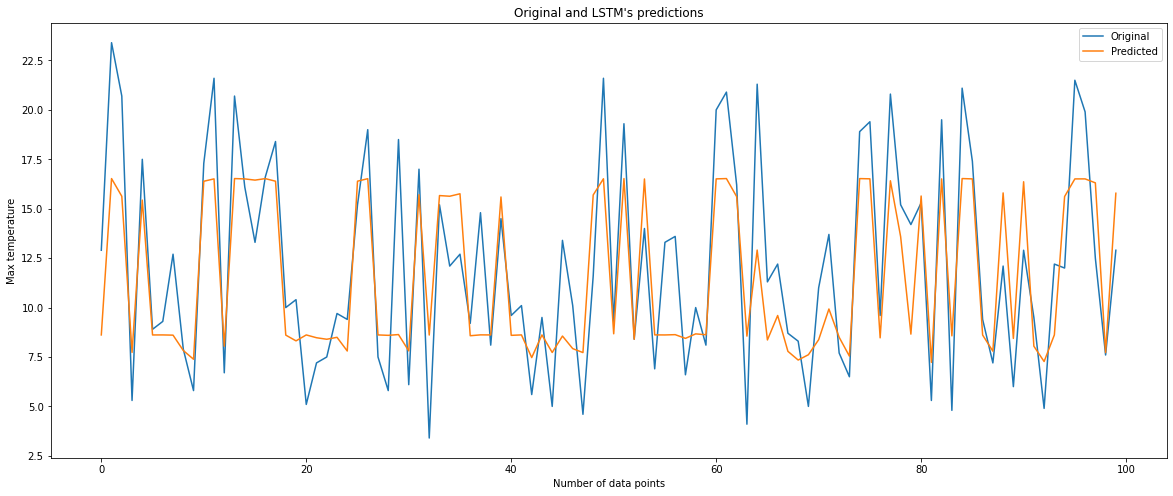

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(y_test[:100],label="Original")
plt.plot(preds_tm[:100],label="Predicted")
plt.xlabel("Number of data points")
plt.ylabel("Max temperature")
plt.title("Original and LSTM's predictions")

plt.legend()
plt.show()

Gradient Boosting Regression

In [30]:
X_train=X_train.reshape((len(X_train),-1))
X_test=X_test.reshape((len(X_test),-1))
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8919068409661423

In [31]:
preds_gb=clf.predict(X_test) # get predictions
preds_gb.shape

(1525,)

In [32]:
from sklearn.metrics import mean_absolute_error
print("mean absolute error: ", mean_absolute_error(y_test, preds_gb))

mean absolute error:  1.2741319860132558


In [33]:
print("mean squared error: ", mean_squared_error(y_test, preds_gb))

mean squared error:  2.766083651046545


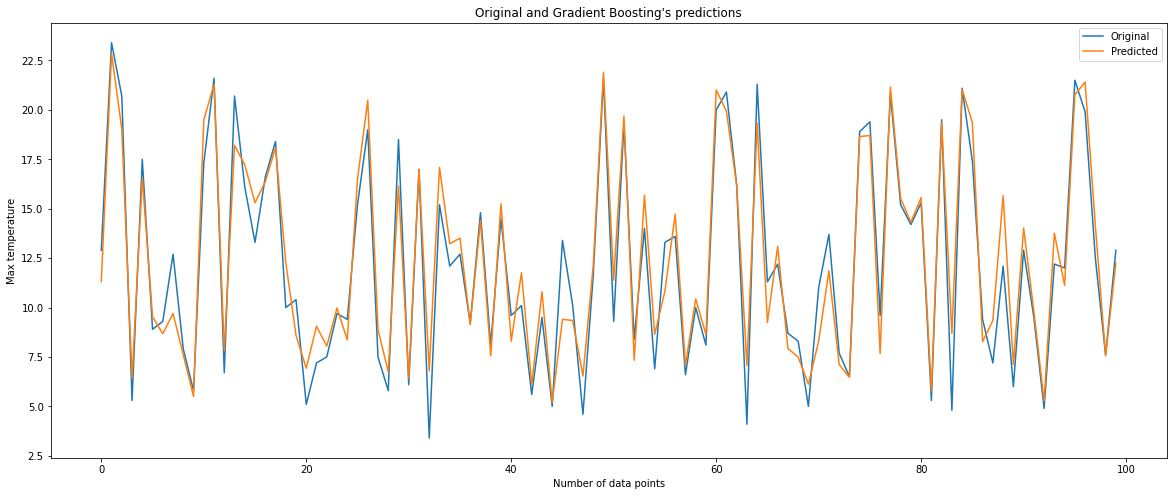

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(y_test[:100],label="Original")
plt.plot(preds_gb[:100],label="Predicted")
plt.xlabel("Number of data points")
plt.ylabel("Max temperature")
plt.title("Original and Gradient Boosting's predictions")
plt.legend()
plt.show()

**Comparison**

In [35]:
print("mean absolute error of random forest: ", mean_absolute_error(y_test, preds_rnd)) # random forest gives the best results
print("mean absolute error of xgboost: ", mean_absolute_error(y_test, preds_xg))
print("mean absolute error of lasso regression: ", mean_absolute_error(y_test, preds_ls))
print("mean absolute error of lstm: ", mean_absolute_error(y_test, preds_tm))
print("mean absolute error of gradient boosting: ", mean_absolute_error(y_test, preds_gb))

mean absolute error of random forest:  1.2215842622950819
mean absolute error of xgboost:  1.3190253324665007
mean absolute error of lasso regression:  1.4516517412242094
mean absolute error of lstm:  2.338589259100742
mean absolute error of gradient boosting:  1.2741319860132558


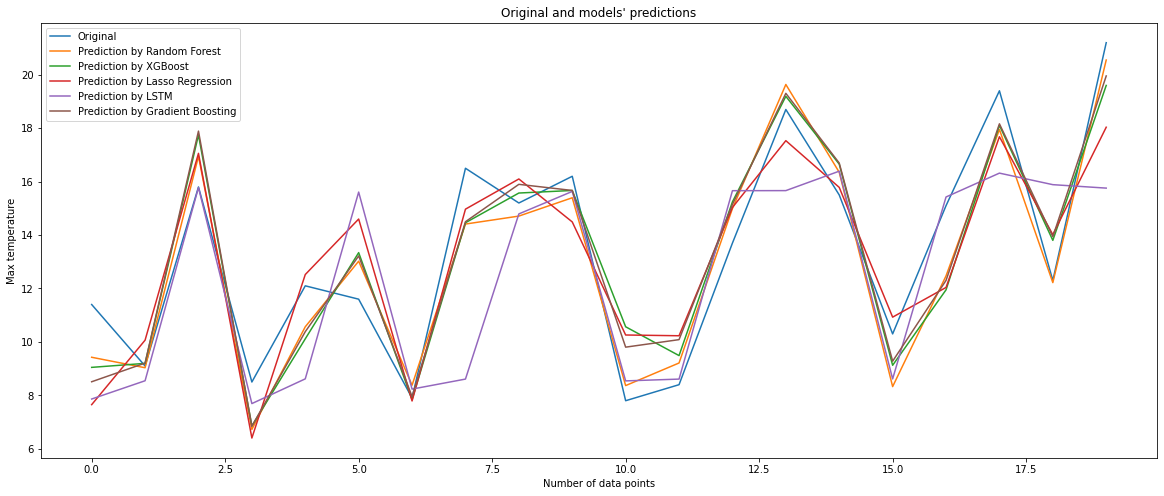

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(y_test[120:140],label="Original")
plt.plot(preds_rnd[120:140],label="Prediction by Random Forest") # random forest is the closest to the original hence it works better
plt.plot(preds_xg[120:140],label="Prediction by XGBoost")
plt.plot(preds_ls[120:140],label="Prediction by Lasso Regression")
plt.plot(preds_tm[120:140],label="Prediction by LSTM")
plt.plot(preds_gb[120:140],label="Prediction by Gradient Boosting")

plt.xlabel("Number of data points")
plt.ylabel("Max temperature")
plt.legend()
plt.title("Original and models' predictions")
plt.show()

**Predicting next month's weather**

In [37]:
X.shape

(5083, 32)

In [38]:
X=X.reshape((len(X),4,8))
X.shape

(5083, 4, 8)

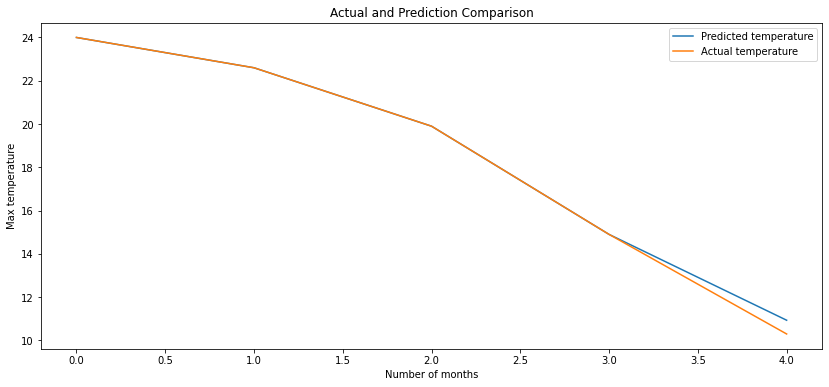

--------------


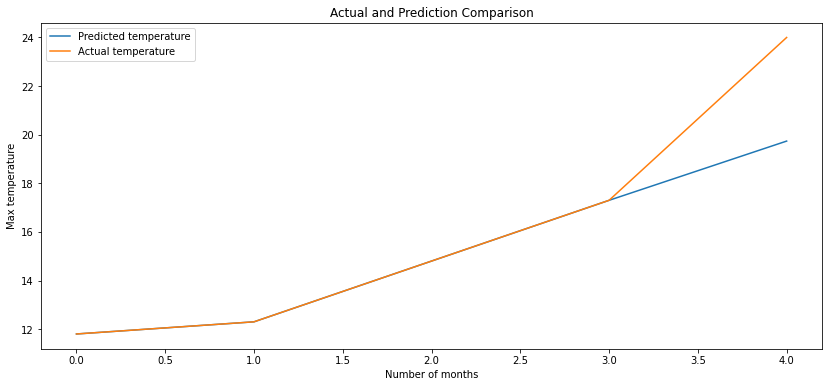

--------------


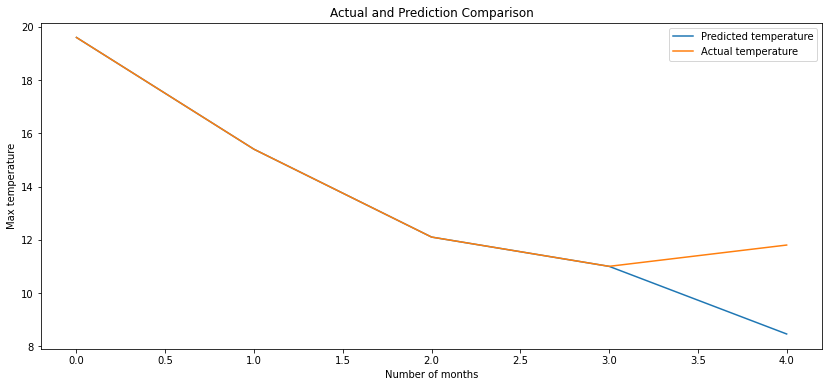

--------------


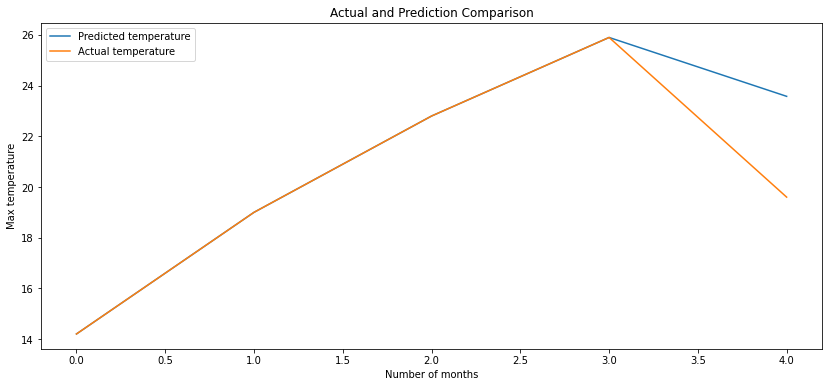

--------------


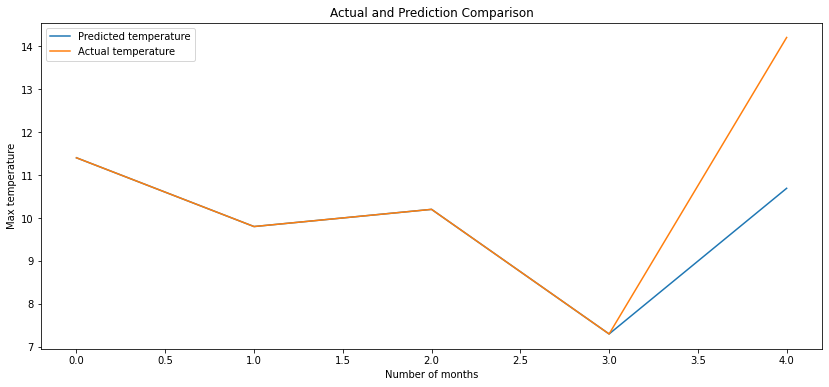

--------------


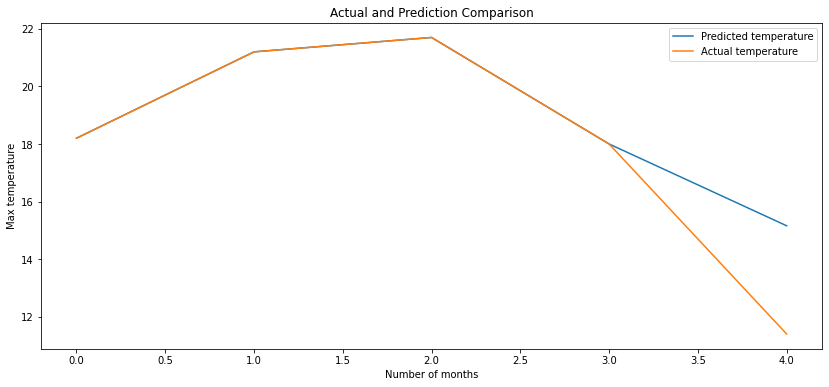

--------------


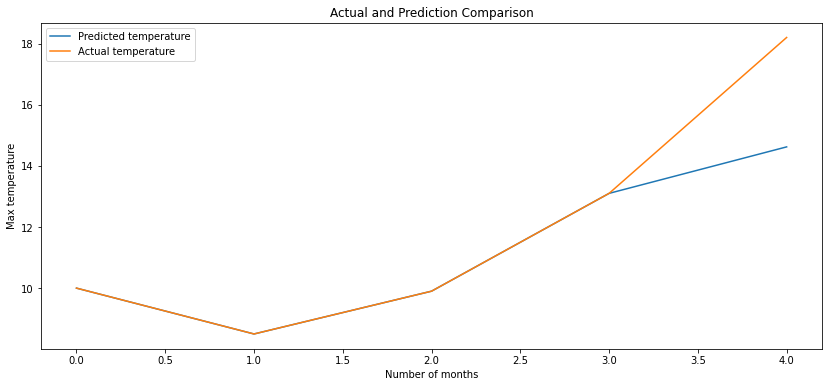

--------------


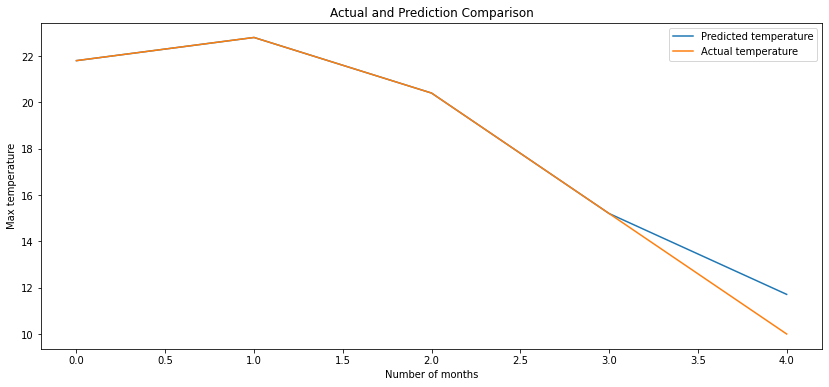

--------------


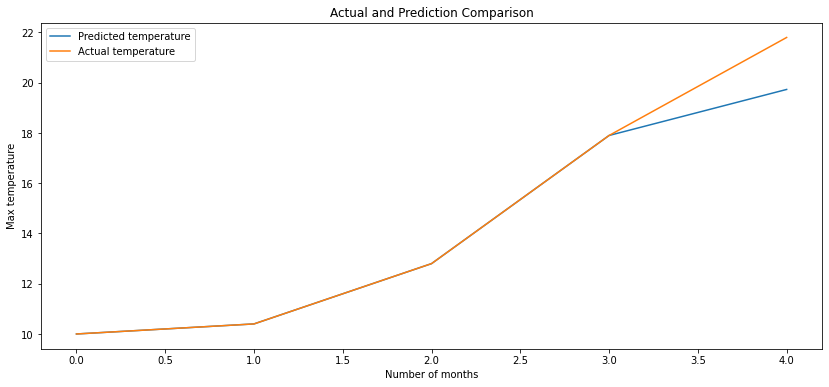

--------------


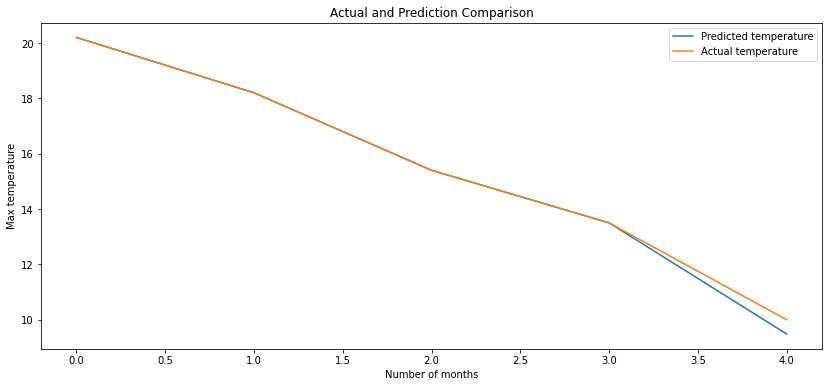

--------------


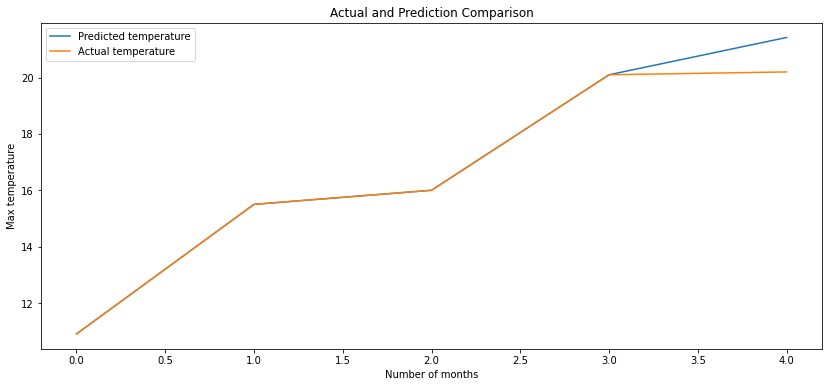

--------------


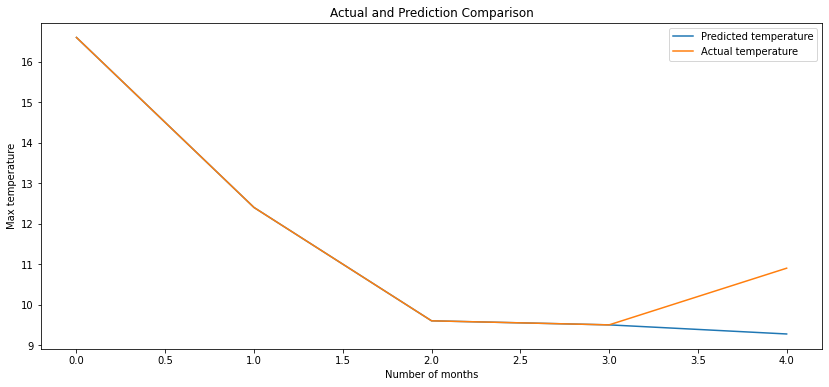

--------------


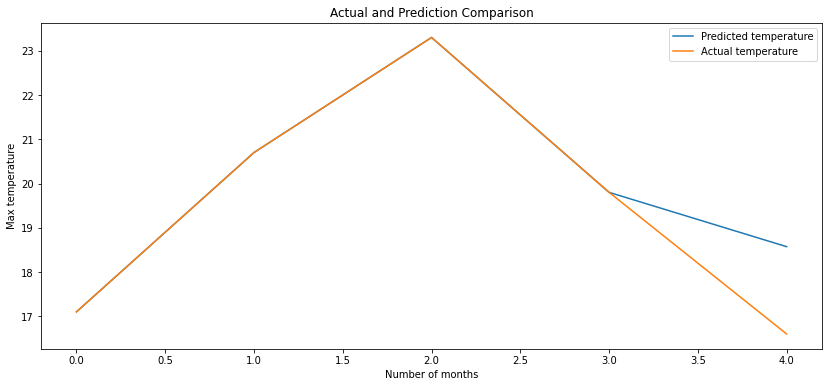

--------------


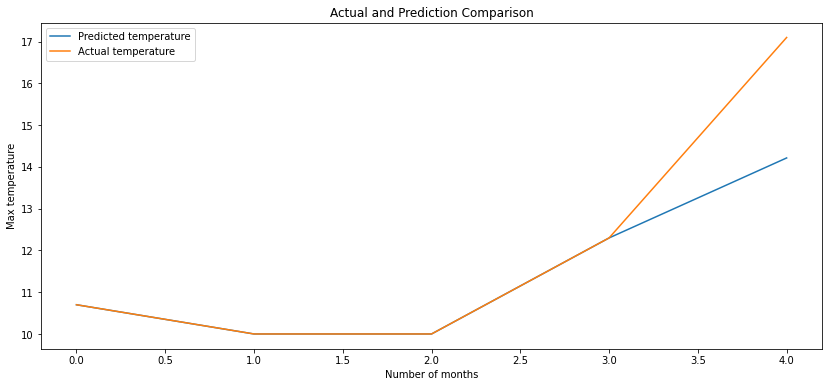

--------------


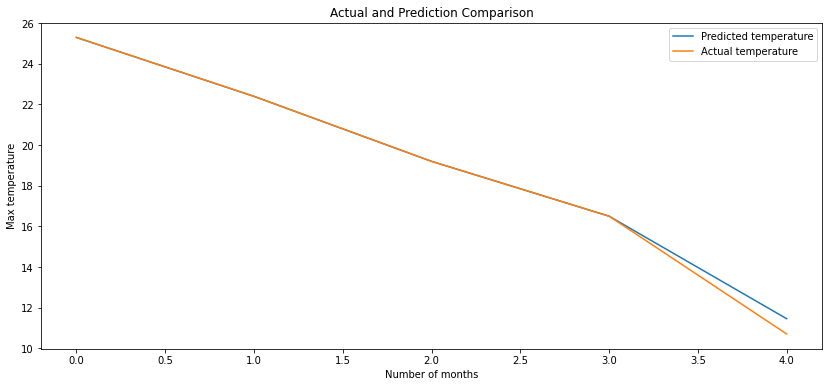

--------------


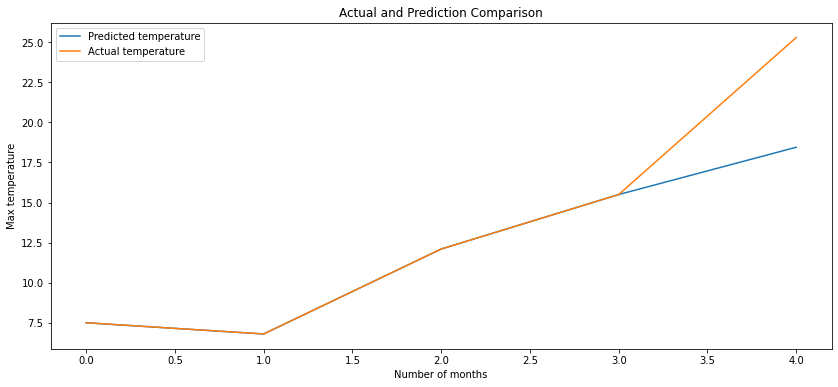

--------------


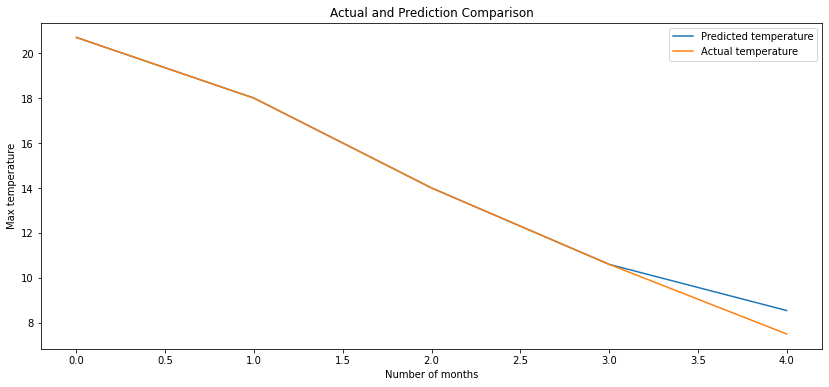

--------------


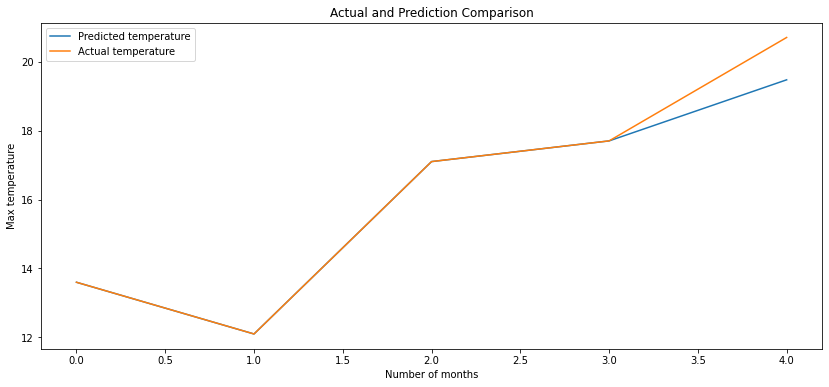

--------------


In [39]:
samples_to_print=20
for i in range(2,samples_to_print):
  pred=clf.predict(X[-i].reshape(1,32))
  previous_temps=X[-i][:,2].tolist() # take previous N month's temperatures 
  previous_temps.append(X[-i+1][:,2][0]) # add last true value
  predicted_temps=X[-i][:,2].tolist()
  predicted_temps.append(pred[0])

  plt.figure(figsize=(14,6))
  plt.plot(predicted_temps, label='Predicted temperature')
  plt.plot(previous_temps, label='Actual temperature')
  plt.legend()
  plt.title("Actual and Prediction Comparison")
  plt.ylabel("Max temperature")
  plt.xlabel("Number of months")

  plt.show()
  print("--------------")
